In [14]:
import pandas as pd

# Use full absolute paths
seattle = pd.read_csv(r"C:\Users\Asus\OneDrive\Seattle U\Fall - 2025\DATA 5100 02\Week-1\Weather\Data\seattle_rain.csv.csv")
stl = pd.read_csv(r"C:\Users\Asus\OneDrive\Seattle U\Fall - 2025\DATA 5100 02\Week-1\Weather\Data\stl_rain.csv.csv")
mumbai = pd.read_csv(r"C:\Users\Asus\OneDrive\Seattle U\Fall - 2025\DATA 5100 02\Week-1\Weather\Data\mumbai_rain.csv.csv")

print("Seattle:", seattle.head())
print("St. Louis:", stl.head())
print("Mumbai:", mumbai.head())

Seattle:        STATION                    NAME    DATE  DAPR  MDPR  PRCP  SNOW  SNWD  \
0  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/1/18   NaN   NaN  0.00   NaN   NaN   
1  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/2/18   NaN   NaN  0.00   NaN   NaN   
2  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/3/18   NaN   NaN  0.00   NaN   NaN   
3  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/4/18   NaN   NaN  0.00   NaN   NaN   
4  US1WAKG0225  SEATTLE 2.1 ESE, WA US  1/5/18   NaN   NaN  0.25   NaN   NaN   

   WESD  WESF  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   NaN  
3   NaN   NaN  
4   NaN   NaN  
St. Louis:        STATION                       NAME        DATE  DAPR  MDPR  PRCP  SNOW  \
0  US1MOSS0027  ST. CHARLES 2.3 NE, MO US  2017-01-01   NaN   NaN  0.00   0.0   
1  US1MOSS0027  ST. CHARLES 2.3 NE, MO US  2017-01-03   NaN   NaN  0.35   NaN   
2  US1MOSS0027  ST. CHARLES 2.3 NE, MO US  2017-01-04   NaN   NaN  0.03   NaN   
3  US1MOSS0027  ST. CHARLES 2.3 NE, MO US  2017-01-05   NaN   NaN  0.04   1.2  

In [20]:
print("Seattle columns:", list(seattle.columns))
print("St. Louis columns:", list(stl.columns))

Seattle columns: ['STATION', 'NAME', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD', 'WESD', 'WESF']
St. Louis columns: ['STATION', 'NAME', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD']


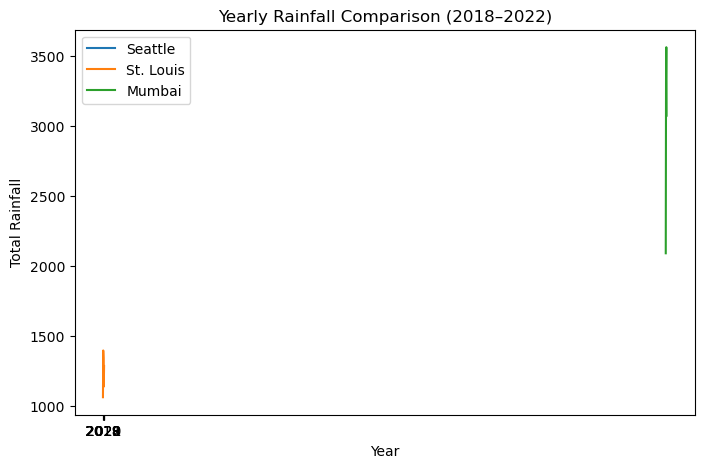

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the data normally
seattle = pd.read_csv(r"C:\Users\Asus\OneDrive\Seattle U\Fall - 2025\DATA 5100 02\Week-1\Weather\Data\seattle_rain.csv.csv")
stl = pd.read_csv(r"C:\Users\Asus\OneDrive\Seattle U\Fall - 2025\DATA 5100 02\Week-1\Weather\Data\stl_rain.csv.csv")
mumbai = pd.read_csv(r"C:\Users\Asus\OneDrive\Seattle U\Fall - 2025\DATA 5100 02\Week-1\Weather\Data\mumbai_rain.csv.csv")

# Ensure DATE is read as string, then extract year
seattle['Year'] = seattle['DATE'].astype(str).str[:4]
stl['Year'] = stl['DATE'].astype(str).str[:4]

# Group by Year and sum precipitation
seattle_yearly = seattle.groupby('Year')['PRCP'].sum().reset_index()
stl_yearly = stl.groupby('Year')['PRCP'].sum().reset_index()

# Limit to 2018–2022
seattle_yearly = seattle_yearly[(seattle_yearly['Year'] >= '2018') & (seattle_yearly['Year'] <= '2022')]
stl_yearly = stl_yearly[(stl_yearly['Year'] >= '2018') & (stl_yearly['Year'] <= '2022')]
mumbai_yearly = mumbai[(mumbai['Year'] >= 2018) & (mumbai['Year'] <= 2022)]

# Plot
plt.figure(figsize=(8,5))
plt.plot(seattle_yearly['Year'], seattle_yearly['PRCP'], label='Seattle')
plt.plot(stl_yearly['Year'], stl_yearly['PRCP'], label='St. Louis')
plt.plot(mumbai_yearly['Year'], mumbai_yearly['Total'], label='Mumbai')
plt.xlabel('Year')
plt.ylabel('Total Rainfall')
plt.title('Yearly Rainfall Comparison (2018–2022)')
plt.legend()
plt.show()


In [28]:
plt.savefig(r"C:\Users\Asus\OneDrive\Seattle U\Fall - 2025\DATA 5100 02\Week-1\Weather\reports\rainfall_comparison.png")

<Figure size 640x480 with 0 Axes>

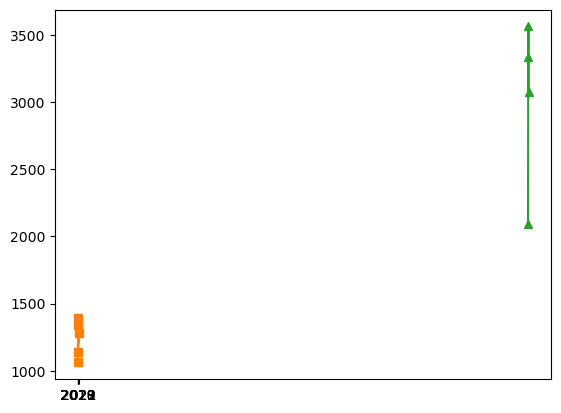

In [31]:
plt.plot(seattle_yearly['Year'], seattle_yearly['PRCP'], marker='o', linestyle='-', label='Seattle')
plt.plot(stl_yearly['Year'], stl_yearly['PRCP'], marker='s', linestyle='--', label='St. Louis')
plt.plot(mumbai_yearly['Year'], mumbai_yearly['Total'], marker='^', linestyle='-', label='Mumbai')

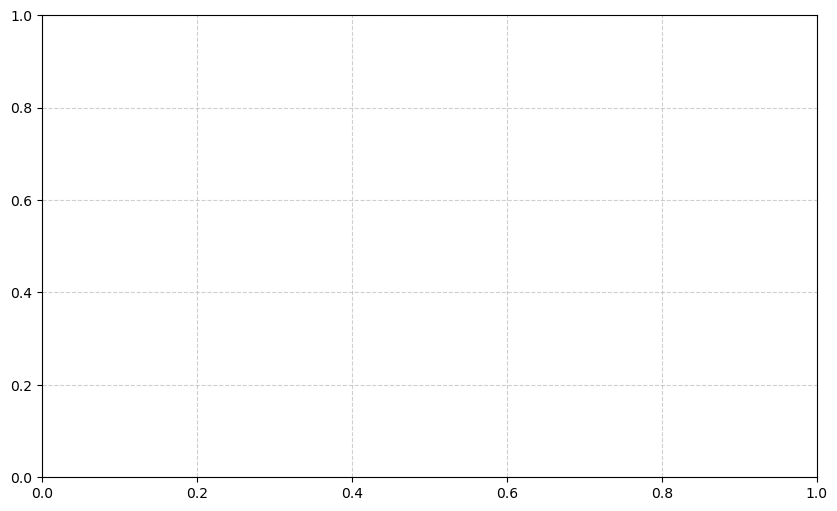

In [33]:
plt.figure(figsize=(10,6))
plt.grid(True, linestyle='--', alpha=0.6)

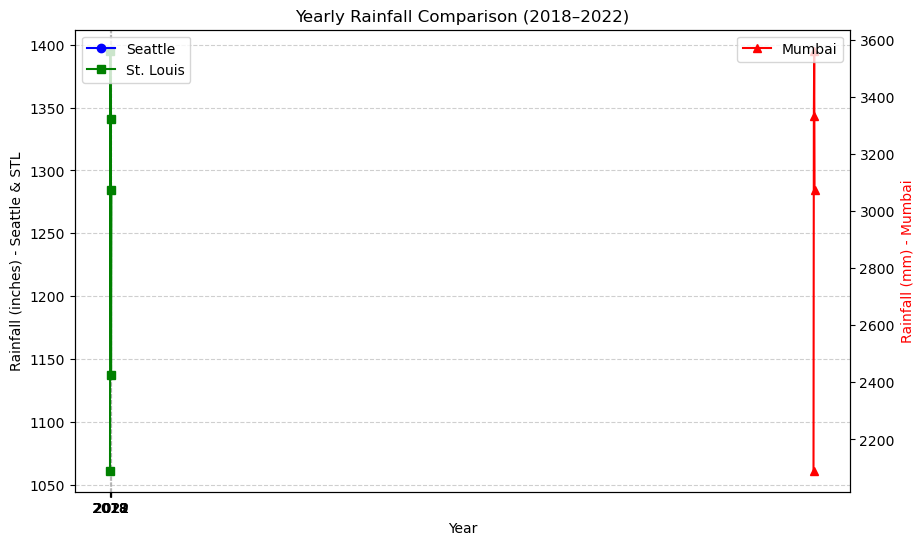

In [39]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(seattle_yearly['Year'], seattle_yearly['PRCP'], marker='o', label='Seattle', color='blue')
ax1.plot(stl_yearly['Year'], stl_yearly['PRCP'], marker='s', label='St. Louis', color='green')
ax1.set_ylabel("Rainfall (inches) - Seattle & STL", color="black")

ax2 = ax1.twinx()  # secondary y-axis
ax2.plot(mumbai_yearly['Year'], mumbai_yearly['Total'], marker='^', color='red', label='Mumbai')
ax2.set_ylabel("Rainfall (mm) - Mumbai", color="red")

ax1.set_xlabel("Year")
ax1.set_title("Yearly Rainfall Comparison (2018–2022)")

ax1.grid(True, linestyle='--', alpha=0.6)

# Legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

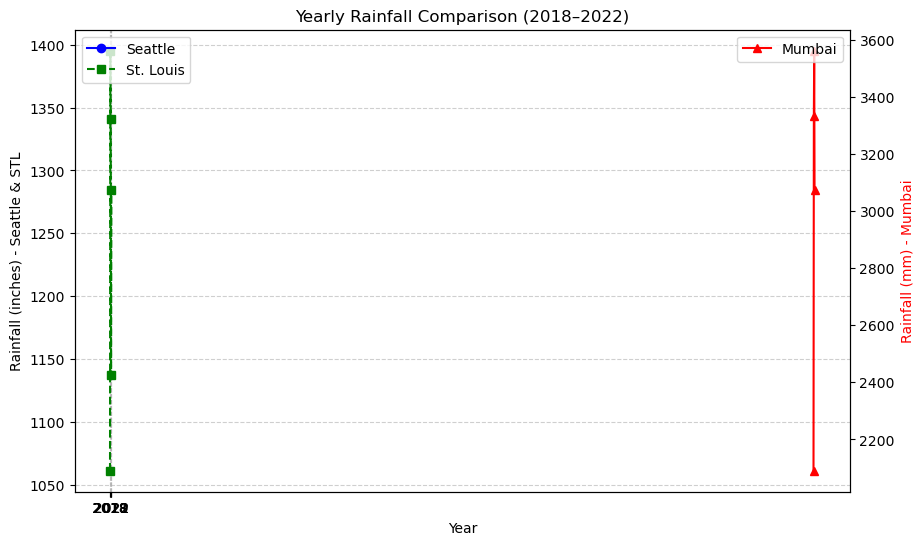

In [42]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

# Seattle + STL (left y-axis)
ax1.plot(seattle_yearly['Year'], seattle_yearly['PRCP'], marker='o', linestyle='-', color='blue', label='Seattle')
ax1.plot(stl_yearly['Year'], stl_yearly['PRCP'], marker='s', linestyle='--', color='green', label='St. Louis')
ax1.set_ylabel("Rainfall (inches) - Seattle & STL", color="black")

# Mumbai (right y-axis)
ax2 = ax1.twinx()
ax2.plot(mumbai_yearly['Year'], mumbai_yearly['Total'], marker='^', linestyle='-', color='red', label='Mumbai')
ax2.set_ylabel("Rainfall (mm) - Mumbai", color="red")

# Labels, title, grid
ax1.set_xlabel("Year")
ax1.set_title("Yearly Rainfall Comparison (2018–2022)")
ax1.grid(True, linestyle='--', alpha=0.6)

# Legends for both sides
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

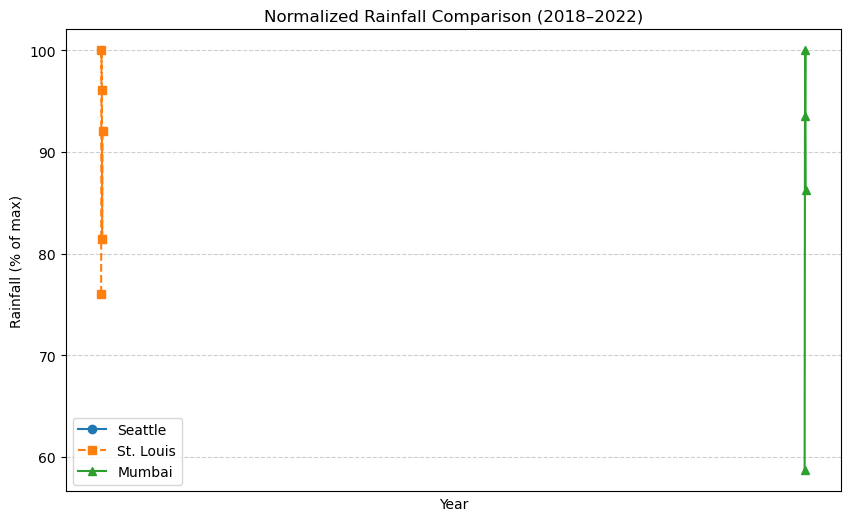

In [46]:
plt.figure(figsize=(10,6))

plt.plot(seattle_yearly['Year'], (seattle_yearly['PRCP'] / seattle_yearly['PRCP'].max()) * 100,
         marker='o', linestyle='-', label='Seattle')
plt.plot(stl_yearly['Year'], (stl_yearly['PRCP'] / stl_yearly['PRCP'].max()) * 100,
         marker='s', linestyle='--', label='St. Louis')
plt.plot(mumbai_yearly['Year'], (mumbai_yearly['Total'] / mumbai_yearly['Total'].max()) * 100,
         marker='^', linestyle='-', label='Mumbai')

plt.xlabel("Year")
plt.ylabel("Rainfall (% of max)")
plt.title("Normalized Rainfall Comparison (2018–2022)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(seattle_yearly['Year'], rotation=45)
plt.show()